# Cyber Security
### Kimberley Maldonado

In [2]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro, kurtosis, skew
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import Counter
from sklearn.model_selection import GridSearchCV

# Data Preprocessing

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
print(rt_iot2022.metadata) 
  
# variable information 
print(rt_iot2022.variables) 

{'uci_id': 942, 'name': 'RT-IoT2022 ', 'repository_url': 'https://archive.ics.uci.edu/dataset/942/rt-iot2022', 'data_url': 'https://archive.ics.uci.edu/static/public/942/data.csv', 'abstract': 'The RT-IoT2022, a proprietary dataset derived from a real-time IoT infrastructure, is introduced as a comprehensive resource integrating a diverse range of IoT devices and sophisticated network attack methodologies. This dataset encompasses both normal and adversarial network behaviours, providing a general representation of real-world scenarios.\nIncorporating data from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a detailed perspective on the complex nature of network traffic. The bidirectional attributes of network traffic are meticulously captured using the Zeek network monitoring tool and the Flowmeter plugin. Researchers can

In [4]:
print(rt_iot2022)

{'data': {'ids':           id
0          0
1          1
2          2
3          3
4          4
...      ...
123112  2005
123113  2006
123114  2007
123115  2008
123116  2009

[123117 rows x 1 columns], 'features':         id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp   

In [5]:
X

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2.282415e+06,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2.028307e+06,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2.281904e+06,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2.047288e+06,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2.087657e+06,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123112,59247,63331,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123113,59247,64623,tcp,-,0.000007,1,1,0,0,144631.172400,...,6.914139e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123114,59247,64680,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024
123115,59247,65000,tcp,-,0.000006,1,1,0,0,167772.160000,...,5.960464e+00,0.0,0.00,0.00,0.00,0.00,0.0,1024,0,1024


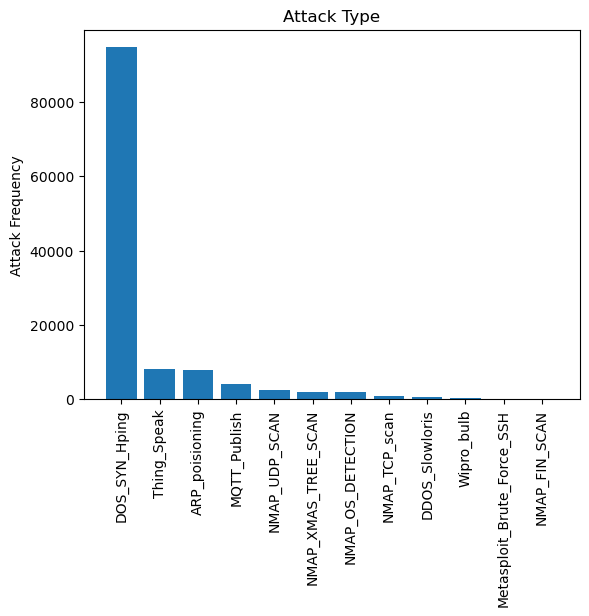

In [6]:
## Plotting distribution of classes
fig, ax = plt.subplots()

fruits = ['DOS_SYN_Hping', 'Thing_Speak', 'ARP_poisioning', 'MQTT_Publish', 'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN',
         'NMAP_OS_DETECTION', 'NMAP_TCP_scan', 'DDOS_Slowloris', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH',
          'NMAP_FIN_SCAN']
counts = np.asarray(y.value_counts().tolist())
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits,counts) #, label=bar_labels, color=bar_colors)

ax.set_ylabel('Attack Frequency')
ax.set_title('Attack Type')
plt.xticks(rotation=90)
plt.show()

In [7]:
print(y['Attack_type'].unique())
print(X['proto'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']
['tcp' 'udp' 'icmp']


In [8]:
#y = np.ravel(y)

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Principal Component Analysis

In [9]:
data_encoded = pd.get_dummies(X, columns=['proto', 'service'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust based on desired variance retention
X_pca = pca.fit_transform(X_scaled)
X_pca = X_pca.astype(np.float32)

# Output the results
print("Number of components kept: ", pca.n_components_)
print("Explained variance ratio: ", pca.explained_variance_ratio_.sum())

Number of components kept:  32
Explained variance ratio:  0.954925650561478


In [10]:
# Convert the PCA-transformed data back into a DataFrame
columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_transformed_df = pd.DataFrame(X_pca, columns=columns)

# Display the first few rows of the transformed dataset
print(pca_transformed_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.181003 -6.828075  2.017667  3.493589 -2.778754  3.234117  0.615673   
1  9.187093 -6.837351  2.052823  3.462516 -2.813211  3.165257  0.414530   
2  9.204041 -6.850761  2.048676  3.493847 -2.792665  3.249311  0.604165   
3  9.214251 -6.857204  2.093185  3.447216 -2.827063  3.196384  0.406184   
4  9.196381 -6.839159  2.054188  3.461204 -2.806359  3.176409  0.453214   

        PC8       PC9      PC10  ...      PC23      PC24      PC25      PC26  \
0  0.126813  1.635588 -1.821072  ...  0.148239  0.120094  0.158559 -0.035362   
1  0.068961  1.752168 -1.800029  ...  0.158393  0.273758  0.146082 -0.113306   
2  0.079998  1.664626 -1.815278  ...  0.154272  0.208125  0.159944 -0.076916   
3 -0.009204  1.783648 -1.777180  ...  0.167873  0.422677  0.154546 -0.180699   
4  0.060387  1.727191 -1.786030  ...  0.157689  0.279946  0.154514 -0.115990   

       PC27      PC28      PC29      PC30      PC31      PC32  
0  0

In [11]:
# Get the PCA components (loadings) of each principal component
loadings = pd.DataFrame(pca.components_.T, columns=columns, index=data_encoded.columns)

# Sort the loadings of each principal component by descending absolute value
sorted_loadings = loadings.apply(lambda x: x.abs().sort_values(ascending=False), axis=0)

# Display the sorted loadings of the first few principal components
print(sorted_loadings.head())

# Optionally, examine the explained variance of each principal component
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, index=columns, columns=['Explained Variance'])
print(explained_variance.head())

                 PC1       PC2       PC3       PC4       PC5       PC6  \
active.avg  0.165916  0.131824  0.031451  0.097856  0.051871  0.045647   
active.max  0.172807  0.168850  0.073915  0.107535  0.057751  0.096952   
active.min  0.158332  0.151950  0.083230  0.099812  0.022271  0.140333   
active.std  0.119718  0.230366  0.018883  0.048080  0.121792  0.002490   
active.tot  0.065210  0.027437  0.182399  0.152098  0.043257  0.125637   

                 PC7       PC8       PC9      PC10  ...      PC23      PC24  \
active.avg  0.009160  0.026544  0.053427  0.027012  ...  0.017573  0.004783   
active.max  0.034617  0.001150  0.032633  0.065982  ...  0.000175  0.008983   
active.min  0.025086  0.004875  0.041845  0.006116  ...  0.001425  0.004037   
active.std  0.003045  0.028303  0.007482  0.033374  ...  0.016676  0.002191   
active.tot  0.056751  0.236062  0.025715  0.038092  ...  0.004655  0.006030   

                PC25      PC26      PC27      PC28      PC29      PC30  \
active

### Ada Boost

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
# The base estimator is a decision tree with max_depth=1 (a stump), which is the default and recommended for AdaBoost
ada_clf = AdaBoostClassifier(
    n_estimators=100,  
    algorithm="SAMME.R", 
    learning_rate=2.0, 
    random_state=42
)

# Fit the AdaBoost classifier on the training data
ada_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_Ada = ada_clf.predict(X_test)

# Calculate and print the classification accuracy
accuracy = accuracy_score(y_test, y_pred_Ada)
print(f'Accuracy: {accuracy}')

# Print a classification report to see precision, recall, and F1-score
print(classification_report(y_test, y_pred_Ada))

C:\Users\maldo\anaconda3.2\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8841374269005848
                            precision    recall  f1-score   support

            ARP_poisioning       0.52      0.11      0.18      1578
            DDOS_Slowloris       0.11      0.93      0.20       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       0.49      1.00      0.66       871
Metasploit_Brute_Force_SSH       0.01      0.83      0.02         6
             NMAP_FIN_SCAN       0.10      0.67      0.17         3
         NMAP_OS_DETECTION       1.00      0.12      0.22       393
             NMAP_TCP_scan       0.91      1.00      0.95       220
             NMAP_UDP_SCAN       0.65      0.92      0.76       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.74      0.38      0.50      1625
                Wipro_bulb       0.16      0.26      0.19        58

                  accuracy                           0.88     24624
                 

Text(0.5, 1.0, 'AdaBoost Confusion Matrix')

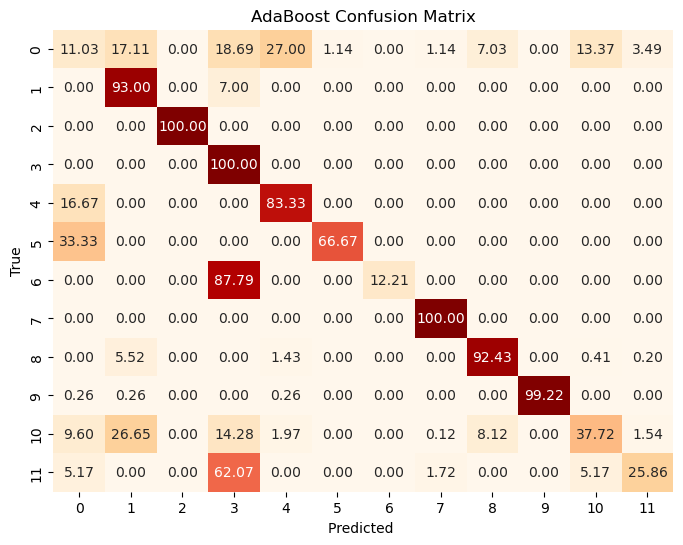

In [21]:
#confusion matrix 
conf_matrix_ada = confusion_matrix(y_test, y_pred_Ada)
#making it percent
cm_percent_ADA = conf_matrix_ada / np.sum(conf_matrix_ada, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_ADA, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('AdaBoost Confusion Matrix')

### Decision Tree

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# More detailed performance analysis
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9960201429499675
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.98      0.97      1578
            DDOS_Slowloris       0.95      1.00      0.98       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       0.99      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.71      0.83      0.77         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.98      0.99       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.98      0.98      0.98      1625
                Wipro_bulb       0.87      0.81      0.84        58

                  accuracy                           1.00     24624
   

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

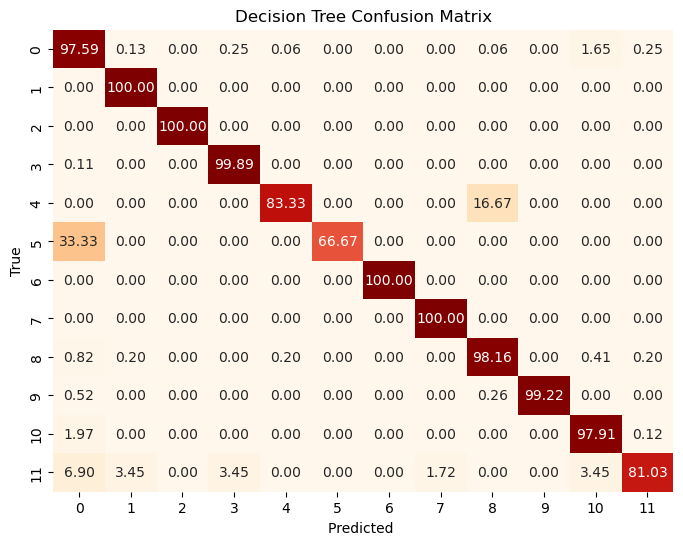

In [19]:
#confusion matrix 
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
#making it percent
cm_percent_DT = conf_matrix_dt / np.sum(conf_matrix_dt, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_DT, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')

### Random Forest

In [14]:
#X_pca is PCA-transformed features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

C:\Users\maldo\anaconda3.2\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

Accuracy: 0.9971572449642625
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.99      0.98      1578
            DDOS_Slowloris       0.99      1.00      1.00       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       1.00      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.83      0.83      0.83         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       1.00      0.98      0.99       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.99      0.98      0.98      1625
                Wipro_bulb       1.00      0.84      0.92        58

                  accuracy                           1.00     24624
                 

Text(0.5, 1.0, 'Random Forest Tree Confusion Matrix')

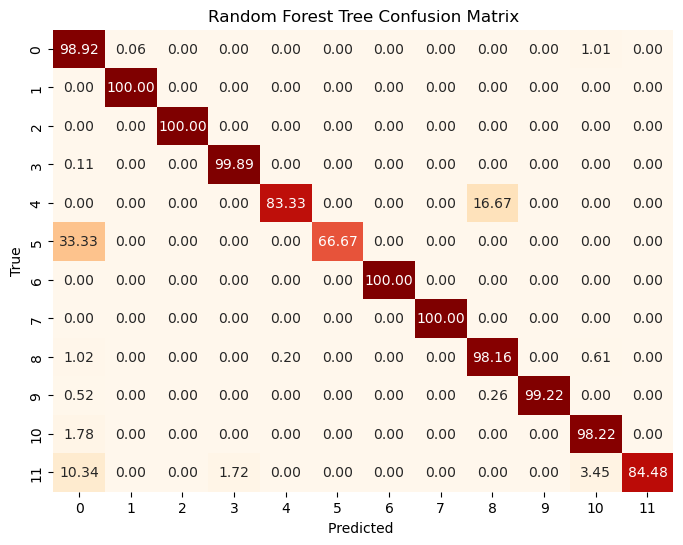

In [15]:
# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_rf))

#confusion matrix 
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
#making it percent
cm_percent_RFF = conf_matrix_rf / np.sum(conf_matrix_rf, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_RFF, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('Random Forest Tree Confusion Matrix')

In [16]:
explained_variance.reset_index

<bound method DataFrame.reset_index of       Explained Variance
PC1             0.171079
PC2             0.111220
PC3             0.089963
PC4             0.084553
PC5             0.071052
PC6             0.044223
PC7             0.034369
PC8             0.033565
PC9             0.028635
PC10            0.023875
PC11            0.021491
PC12            0.019984
PC13            0.019341
PC14            0.017782
PC15            0.016662
PC16            0.013358
PC17            0.012821
PC18            0.012557
PC19            0.011775
PC20            0.011113
PC21            0.010786
PC22            0.010753
PC23            0.010730
PC24            0.010350
PC25            0.009382
PC26            0.009213
PC27            0.008654
PC28            0.008390
PC29            0.007392
PC30            0.007140
PC31            0.006634
PC32            0.006082>

### KNN Model

C:\Users\maldo\anaconda3.2\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9949236517218973
                            precision    recall  f1-score   support

            ARP_poisioning       0.96      0.97      0.97      1578
            DDOS_Slowloris       0.98      0.96      0.97       100
             DOS_SYN_Hping       1.00      1.00      1.00     18897
              MQTT_Publish       0.99      1.00      1.00       871
Metasploit_Brute_Force_SSH       1.00      0.67      0.80         6
             NMAP_FIN_SCAN       1.00      0.67      0.80         3
         NMAP_OS_DETECTION       1.00      1.00      1.00       393
             NMAP_TCP_scan       1.00      1.00      1.00       220
             NMAP_UDP_SCAN       0.99      0.98      0.98       489
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       384
               Thing_Speak       0.97      0.98      0.97      1625
                Wipro_bulb       1.00      0.76      0.86        58

                  accuracy                           0.99     24624
                 

Text(0.5, 1.0, 'KNN Confusion Matrix')

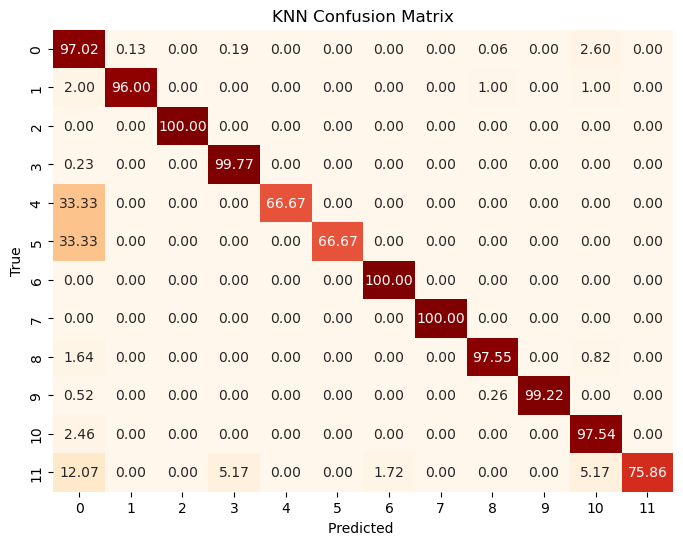

In [17]:
# Instantiate the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_knn))

#confusion matrix 
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
#making it percent
cm_percent_KNN = conf_matrix_knn / np.sum(conf_matrix_knn, axis=1, keepdims=True) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_KNN, annot=True,cmap= 'OrRd' ,fmt=".2f", cbar=False)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.title('KNN Confusion Matrix')

### Gaussian mixture model

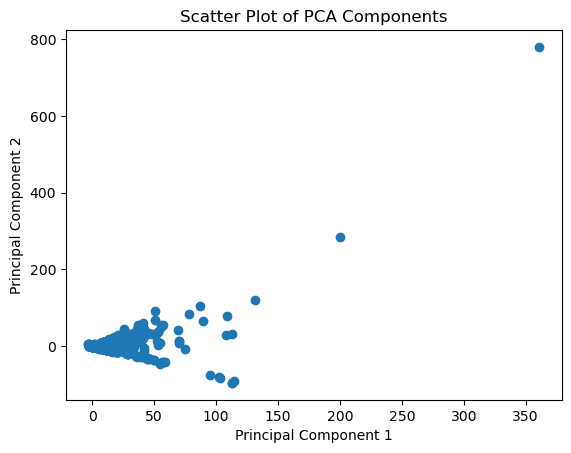

Kurtosis: 53194.34262650082
Skewness: 212.75665042212162
Shapiro-Wilk Test: Statistics=0.040, p=0.000


C:\Users\maldo\anaconda3.2\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [23]:
# Example for a single feature.
feature = data_encoded['active.avg']

# Scatter plot for two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('Scatter Plot of PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Kurtosis and Skewness
print(f"Kurtosis: {kurtosis(feature)}")
print(f"Skewness: {skew(feature)}")

# Normality Test
stat, p = shapiro(feature)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

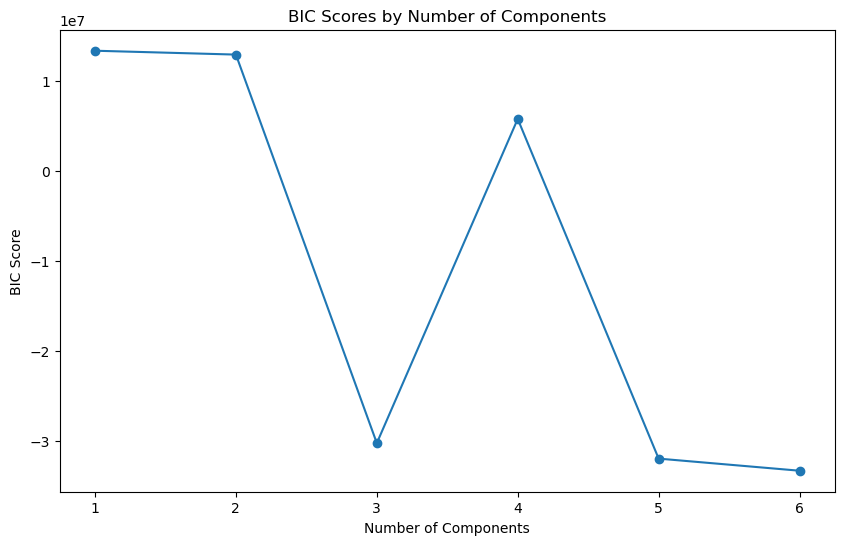

In [25]:
bic = []
n_components_range = range(1, 7)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)
    bic.append(gmm.bic(X_pca))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, marker='o')
plt.title('BIC Scores by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

Choose n=3 components

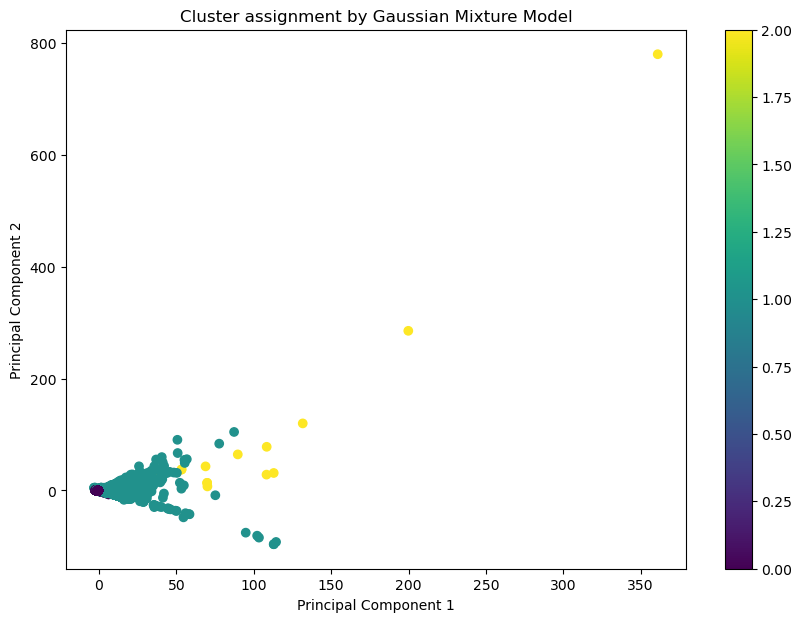

In [26]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_pca)

# Predict the cluster for each data point
labels = gmm.predict(X_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title('Cluster assignment by Gaussian Mixture Model')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [27]:
 # print the converged log-likelihood value
print(gmm.lower_bound_)
 
# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

64.34044304587367
12
